In [58]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import math as m

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.collections import LineCollection

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as wg
from IPython.display import display

In [2]:
def pattern(a):
   return (n/2) * m.sin(a*(m.pi*(2/n))) + (n/2)

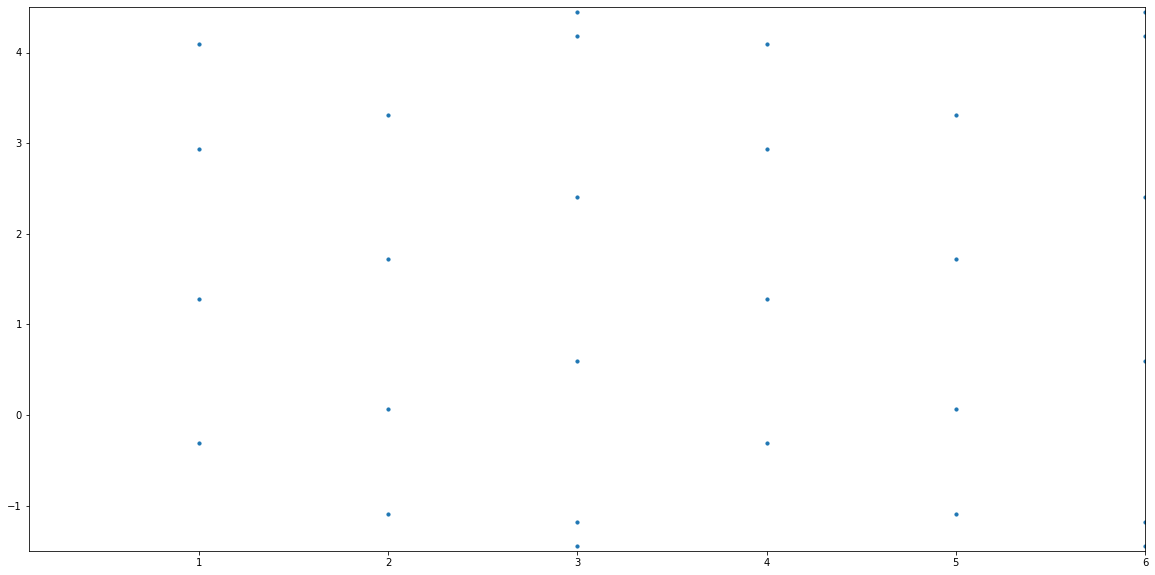

In [77]:
n = 3
coord = []

for i in range (-n, 3*n):
    for j in range (-n, 2*n):
        
        vect = pattern(i) - j
        
        if vect >= 0:
            y = j + 10/(abs(vect)**2)
        elif vect < 0:
            y = j - 10/(abs(vect)**2)
        coord.append((i, y))

x, y = zip(*coord)
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.scatter(x, y, s = 10)
ax = plt.ylim(-0.5*n, 1.5*n)
ax = plt.xlim(0.1 , 2*n)

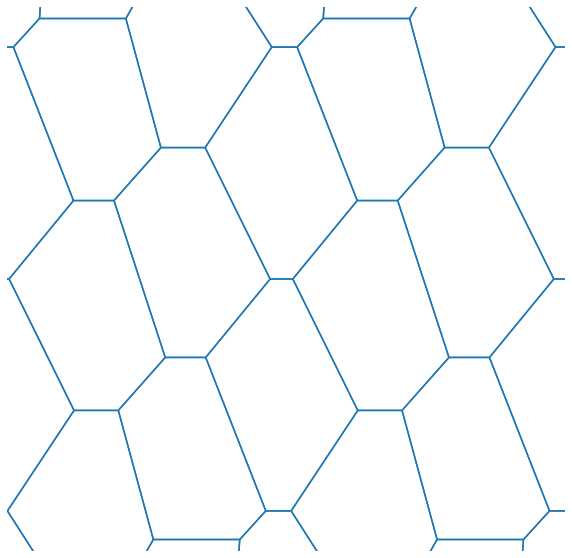

In [78]:
vor = Voronoi(coord)
verts = vor.vertices
shapes_ind = vor.regions

shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
shapes = [verts[s] for s in shapes_ind]
    

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(0.1 , 2*n)
ax.set_ylim(-0.2*n, 1.2*n)
plt.grid(False)
plt.axis('off')
lc = LineCollection(shapes)
ax.add_collection(lc)

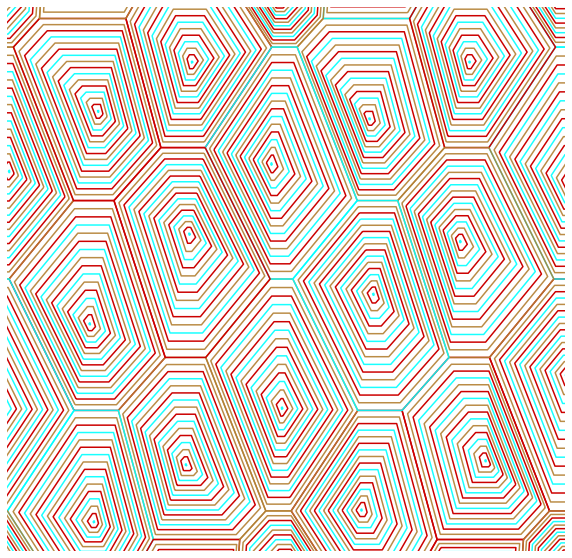

In [117]:
min_scalar = 0.01
n_fill_lines = 15

pallete = sns.color_palette("husl", 2 ** n - 1)
cols = []

fill = []
    
for s in shapes:
    center = np.mean(s, axis=0)
    smax = len(shapes)
    cols.append(((s/smax), (s/smax), (s/2*smax), 1 ))
    for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
        scaled = scaler*(s - center) + center
        fill.append(scaled)
            
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(0.1 , 2*n)
ax.set_ylim(-0.2*n, 1.2*n)
plt.grid(False)
plt.axis('off')
lc = LineCollection(shapes + fill, colors = [(0.7,0.5,0.2,0.9), (0,1,1,0.9), (0.8, 0, 0)])
ax.add_collection(lc)

In [123]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import math as m

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.collections import LineCollection

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as wg
from IPython.display import display

def make_art(n = 3, n_fill_lines = 13,
             col1 = 'blue', col2 = 'blue', col3 = 'blue',
             min_scalar = 0.15, function = 'sin', period = 3,  
             adj_magnitude = 10, min_vertices = 0):

    np.random.seed(n*10)
    
    #define which function to use
    if function == 'sin':
        def pattern(a):
            return (n/2) * m.sin(a*(m.pi*(2/period))) + (n/2)
    elif function == 'rand':
        def pattern(a):
            return np.random.uniform(-n, 2*n)
    
    #generate points
    coord = []
    
    for i in range (-n, 3*n):
        for j in range (-n, 2*n):

            vect = pattern(i) - j
            
            #adjust points
            if vect >= 0:
                y = j + adj_magnitude/(abs(vect)**2 + 0.000001)
            elif vect < 0:
                y = j - adj_magnitude/(abs(vect)**2)
            coord.append((i, y))

    #create voronoi diagram
    vor = Voronoi(coord)
    verts = vor.vertices
    shapes_ind = vor.regions

    #select colours
    cols = [col1, col2, col3]
    
    #fill shapes with lines
    shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>min_vertices and -1 not in s]
    shapes = [verts[s] for s in shapes_ind]
    fill = []
    
    for s in shapes:
        center = np.mean(s, axis=0)
        for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
            scaled = scaler*(s - center) + center
            fill.append(scaled)

    #plot results
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xlim(0.1 , 2*n)
    ax.set_ylim(-0.2*n, 1.2*n)
    ax.set_aspect('equal')
    plt.grid(False)
    plt.axis('off')
    lc = LineCollection(shapes + fill, colors = cols)
    ax.add_collection(lc)

#create widgets
w = interactive (make_art, n = (3,19,2),
            n_fill_lines = (0, 30, 1),
            col1 = ['blue', 'green', 'red', 'yellow', 'orange', 'black', 'gray', 'brown', 'hotpink', 'teal'],
            col2 = ['blue', 'green', 'red', 'yellow', 'orange', 'black', 'gray', 'brown', 'hotpink', 'teal'],
            col3 = ['blue', 'green', 'red', 'yellow', 'orange', 'black', 'gray', 'brown', 'hotpink', 'teal'],
            min_scalar = (0.01,1,0.01),
            function = ['sin','rand'],
            period = (0.5, 20, 0.5),
            min_vertices = (0, 9, 1),
            adj_magnitude = (-15, 30, 0.01))
display(w)

interactive(children=(IntSlider(value=3, description='n', max=19, min=3, step=2), IntSlider(value=13, descript…